In [1]:
#this is to learn and simulate 
#E and I nerons do not mix randomly 
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


torch.manual_seed(42)


n=6
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
lr = 1e-1
n_epochs = 100

optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)

#P=(np.absolute(np.random.randint(low=1, high=100, size=math.ceil(n/2))))
P=np.array([50,20,10])
print (w)
for epoch in range(n_epochs):
    print (epoch)
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32'),
                   'penalty':torch.from_numpy(P)
                    })  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32'),
                   'penalty':torch.from_numpy((np.array([1] * round(n/2))))
                   })   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi]).reset_index(drop=True)
    #zf = pd.concat([ze, zi])
    #mix the joint population 
    #zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    z1=np.zeros(n)
    #p=torch.zeros(1,n)
    
    #generate the population tensor 
    for d in range(n):
        z1[d]=(zf.loc[d,'Value'])
    
    z2=torch.from_numpy(z1)
    z=z2.type(dtype=torch.float)
    print (z)
    
    #
    #generate penalty vector
    p=np.zeros(n)
    for e in range(n):
        p[e]=(zf.loc[e,'penalty'])        
    #print(z,w)
    #create a new tensor to prevent the leaf variable go into the learning process  
    p2=torch.from_numpy(p)
    p3=torch.diag(p2)
    p1=p3.type(dtype=torch.float)
    print (p1)
    
    #generate weight matrix 
    wi=torch.randn(n,n)
    for i in range(n):
        for j in range(n):
            #print (z.loc[j,'sign'])
            #print (w[i,j])
            wi[i,j]=(zf.loc[j,'sign'])*np.absolute(w[i,j])
            #print (w[i,j])
    
    w1=torch.diag(wi)
    w_rec=torch.diag(w1)
    w1_rec = wi-w_rec
    print (w1_rec)
    
    loss=0
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        loss = loss + ((z@p1)**2).mean()
    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
   
 


print (w,w1_rec)










tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047, -0.7521,  1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688,  0.7624,  1.6423, -0.1596],
        [-0.4974,  0.4396,  0.3189, -0.4245,  0.3057, -0.7746],
        [ 0.0349,  0.3211,  1.5736, -0.8455, -1.2742,  2.1228],
        [-1.2347, -0.4879, -1.4181,  0.8963,  0.0499,  2.2667]],
       requires_grad=True)
0
tensor([ 0.4619,  1.0439,  0.6930, -1.4762, -0.5951, -0.6594])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  1.4873,  0.9007,  2.1055, -0.6784,  1.2345],
        [-0.0431,  0.0000, -0.7521, -1.6487,  0.3925,  1.4036],
        [-0.7279, -0.5594,  0.0000, -0.7624, -1.6423,  0.1596],
        [-0.4974,  0.4396,  0.3189,  0.0000, -0.3057,  0.7746],
        [ 0.0349,  0.3211,

11
tensor([ 1.0650,  0.1679,  0.1089, -1.2552, -0.6075, -0.7973])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.9385,  1.8552,  2.9758, -1.3897,  2.1502],
        [-0.3656,  0.0000, -0.3752, -1.6526, -0.0992,  1.7766],
        [-0.8380, -0.3359,  0.0000, -0.8541, -2.3287,  0.3261],
        [-0.5000,  0.4659, -0.0034,  0.0000, -0.7293,  0.7654],
        [ 0.5636,  0.3069,  1.3005,  0.7183,  0.0000, -2.3137],
        [-1.2583, -0.9293, -1.2431, -1.1004,  0.7125,  0.0000]],
       grad_fn=<SubBackward0>)
12
tensor([ 0.1706,  0.6639,  1.4101, -0.6145, -0.7337, -0.3897])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

23
tensor([ 0.1955,  0.6931,  0.4942, -0.1850, -1.1818, -0.9842])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.6682,  2.5356,  3.7518, -2.1193,  2.9293],
        [-0.6724,  0.0000, -0.2416, -1.9850, -0.4810,  2.1359],
        [-0.7057, -0.1904,  0.0000, -1.1439, -2.3209,  0.1402],
        [-0.9485,  0.3602,  0.2895,  0.0000, -0.9250,  1.0208],
        [ 0.3881,  0.3834,  1.5132,  1.0900,  0.0000, -1.8173],
        [-1.2070, -1.1336, -0.8516, -1.0541,  1.1536,  0.0000]],
       grad_fn=<SubBackward0>)
24
tensor([ 1.0891,  0.9736,  0.0323, -1.3630, -1.3216, -0.4524])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

35
tensor([ 0.5068,  1.1478,  2.0381, -0.3485, -0.8317, -0.9491])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.9116,  2.9327,  4.6138, -2.6672,  3.5700],
        [-0.8280,  0.0000, -0.1316, -2.3860, -0.9010,  2.4999],
        [-0.8060,  0.1311,  0.0000, -1.2159, -2.1810, -0.0060],
        [-1.1893,  0.8149,  0.3275,  0.0000, -0.9439,  0.9329],
        [ 0.5114,  0.3098,  1.6620,  1.2005,  0.0000, -1.5327],
        [-1.0589, -0.9747, -0.7203, -1.3800,  1.5480,  0.0000]],
       grad_fn=<SubBackward0>)
36
tensor([ 0.9403,  0.3051,  1.0011, -0.1165, -1.7646, -0.7394])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

47
tensor([ 1.0971,  0.1432,  0.4935, -0.5559, -0.4864, -1.5989])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  1.1928,  3.1910,  5.6036, -3.1562,  4.1063],
        [-0.7271,  0.0000, -0.0598, -2.8603, -1.0169,  2.6956],
        [-0.9526,  0.2197,  0.0000, -1.2748, -2.0017, -0.0782],
        [-1.3674,  0.9178,  0.2807,  0.0000, -1.0153,  0.8971],
        [ 0.6970,  0.4113,  1.6823,  1.0587,  0.0000, -1.3324],
        [-1.1368, -0.8801, -0.5816, -1.3172,  1.8044,  0.0000]],
       grad_fn=<SubBackward0>)
48
tensor([ 0.6330,  1.2885,  0.0978, -0.0065, -0.1570, -1.0762])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

59
tensor([ 0.9762,  0.4946,  1.2444, -1.2597, -0.3547, -1.0441])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  1.2166,  3.3963,  6.2260, -3.7919,  4.5978],
        [-0.7716,  0.0000,  0.0639, -2.9168, -1.2572,  3.0019],
        [-1.0173,  0.4171,  0.0000, -1.7472, -1.9752, -0.3288],
        [-1.4240,  1.0068,  0.1220,  0.0000, -0.8243,  0.6989],
        [ 0.4573,  0.6982,  1.9108,  1.4742,  0.0000, -0.8871],
        [-1.1657, -0.8845, -0.5130, -1.1849,  1.9686,  0.0000]],
       grad_fn=<SubBackward0>)
60
tensor([ 1.7441,  0.8278,  1.3250, -1.2223, -1.1831, -0.7234])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

71
tensor([ 0.6630,  0.4908,  2.3414, -0.8828, -0.5349, -1.6640])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000e+00,  1.5135e+00,  3.6396e+00,  6.8702e+00, -4.4505e+00,
          5.1205e+00],
        [-8.0094e-01,  0.0000e+00,  1.7523e-01, -3.1260e+00, -1.7165e+00,
          3.3055e+00],
        [-1.2755e+00,  3.6223e-01,  0.0000e+00, -1.7010e+00, -2.0462e+00,
         -2.6766e-01],
        [-1.1362e+00,  8.2301e-01,  6.7518e-03,  0.0000e+00, -9.2435e-01,
          1.1063e-01],
        [ 6.6034e-01,  8.0543e-01,  2.1023e+00,  1.3585e+00,  0.0000e+00,
         -8.5030e-01],
        [-1.1235e+00, -9.9947e-01, -5.4824e-01, -1.4534e+00,  1.9544e+00,
          0.0000e+00]], grad_fn=<SubBackward0>)
72
tensor([ 0.4545,  0.2649,  0.5632, -1.1538, -1.4830, -0.9646])
tensor([[50.,  0.,  

82
tensor([ 0.7548,  0.6764,  0.7286, -0.2509, -0.5974, -0.1227])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  1.8665,  4.0259,  7.4782, -5.1069,  5.6475],
        [-0.7842,  0.0000,  0.0389, -3.4193, -2.1381,  3.4538],
        [-1.4029,  0.2467,  0.0000, -1.7739, -2.2469, -0.3504],
        [-1.3233,  0.7630,  0.0121,  0.0000, -0.8368, -0.0534],
        [ 1.0210,  0.8411,  1.9864,  1.2030,  0.0000, -0.9652],
        [-1.1754, -1.0209, -0.6507, -1.7464,  1.9064,  0.0000]],
       grad_fn=<SubBackward0>)
83
tensor([ 0.3821,  0.5327,  0.4003, -0.1336, -0.7683, -0.2830])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

93
tensor([ 0.2748,  0.5283,  0.3130, -0.8768, -0.0977, -2.0951])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  2.1041,  4.3823,  7.9525, -5.8390,  6.1421],
        [-0.9070,  0.0000,  0.0620, -3.5502, -2.5640,  3.7058],
        [-1.5363,  0.0417,  0.0000, -1.9280, -2.4690, -0.3849],
        [-1.4918,  0.9626, -0.3684,  0.0000, -0.6984, -0.0823],
        [ 1.2635,  1.1888,  1.9604,  1.3378,  0.0000, -0.9804],
        [-1.3618, -1.0340, -0.6716, -1.7514,  2.1603,  0.0000]],
       grad_fn=<SubBackward0>)
94
tensor([ 0.9470,  1.8150,  1.5360, -1.7532, -0.3153, -1.4132])
tensor([[50.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0

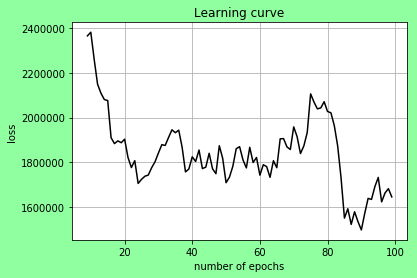

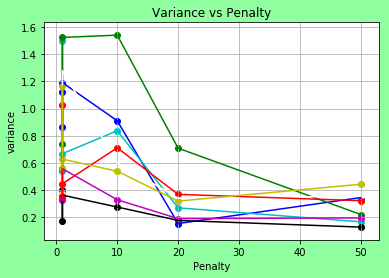

tensor([50, 20, 10,  1,  1,  1])


In [5]:

#this is to plot the graph 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title('Learning curve')
df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=10).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.grid(True)
plt.show()



fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('variance')
plt.xlabel('Penalty')
plt.title('Variance vs Penalty')
plt.grid(True)
color=['b','c','k','g','w','m','r','y']
for a in range(8):
    #print (a)
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32')})  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32')})   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi]).reset_index(drop=True)
    #mix the joint population 
    #zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    #print (ze,zi,zf,zd)
    z1=np.zeros(n)
  
    for m in range(n):
        z1[m]=(zf.loc[m,'Value'])
        

    z2=torch.from_numpy(z1)
    z=z2.type(dtype=torch.float)
        

    Z=torch.zeros(T,n)
    #print (z)
   
    
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z
        Z_split = torch.split(Z,int(T/2),dim=0)[1]
        
    V=torch.zeros(n,1)
    
    P1=torch.from_numpy(np.append(P,[1,1,1]))
    

    for i in range(n):
        V[i]=torch.var(Z_split[:,i])  
        
    plt.scatter(P1,V.detach().numpy(),color=color[a])   
    plt.plot(P1.detach().numpy(),V.detach().numpy(),color=color[a]) 
    
plt.show() 
print (P1)





In [1]:
print (ze,zi)

NameError: name 'ze' is not defined